# 5. Análisis de Texto
- WordCloud de palabras frecuentes por categoría (positiva/negativa)
- Bigrams o trigrams frecuentes
- Asociación entre ciertas palabras y calificaciones
- Clasificador de sentimiento con Naive Bayes o Logistic Regression


####Instalar librerias

In [ ]:
!pip install wordcloud
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install nltk
!pip install seaborn
!pip install plotly

Importaremos librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

####Cargaremos datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/df_EDA.csv')
df.head()

,reviewer_id,store_name,store_category,store_address,latitude,longitude,num_ratings,review_time,review,rating,...,review_date,review_month,review_year,review_length,word_count,has_positive_words,has_negative_words,binary_rating,review_limpio,lemmatized_review
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,...,2023-03-31,2023-03,2023.0,259,25,False,False,0,look like someone spit food? normal transactio...,look like spit food normal transaction chill p...
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,...,2023-06-24,2023-06,2023.0,237,19,True,False,1,mcdonalds. far food atmosphere go. staff make ...,mcdonald far food atmosphere staff difference ...
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,...,2023-06-24,2023-06,2023.0,415,34,False,False,0,made mobile order got speaker checked in. line...,mobile order get speaker check line move leave...
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",1 months ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,...,2023-05-30,2023-05,2023.0,176,9,False,False,1,mc. crispy chicken sandwich ïïïïïïïïïïïïïïïïïï...,mc crispy chicken sandwich ïïïïïïïïïïïïïïïïïïï...
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,...,2023-04-30,2023-04,2023.0,312,37,False,False,0,"repeat order 3 times drive thru, still manage ...",repeat order 3 time drive manage mess suppose ...


In [ ]:
df.columns

Index(['reviewer_id', 'store_name', 'store_category', 'store_address',
       'latitude', 'longitude', 'num_ratings', 'review_time', 'review',
       'rating', 'rating_score', 'review_date', 'review_month', 'review_year',
       'review_length', 'word_count', 'has_positive_words',
       'has_negative_words', 'binary_rating', 'review_limpio',
       'lemmatized_review'],
      dtype='object')

##WordCloud

WordCloud de palabras frecuentes por categoría (positiva/negativa)
- ¿Para qué sirve?
Para visualizar rápidamente las palabras más comunes en reseñas positivas o negativas, y entender qué temas dominan cada tipo de reseña.

- Requisitos previos:
Necesitas una columna con el sentimiento clasificado (por ejemplo, “positivo” y “negativo”). Si no lo tienes explícito, puedes hacerlo clasificando por calificación:

    - Reseñas con calificación ≥ 4 → positivas

    - Reseñas con calificación ≤ 2 → negativas

    - Reseñas con 3 → neutras o ignorarlas

In [ ]:
df.columns

Index(['reviewer_id', 'store_name', 'store_category', 'store_address',
       'latitude', 'longitude', 'num_ratings', 'review_time', 'review',
       'rating', 'rating_score', 'review_date', 'review_month', 'review_year',
       'review_length', 'word_count', 'has_positive_words',
       'has_negative_words', 'binary_rating', 'review_limpio',
       'lemmatized_review'],
      dtype='object')

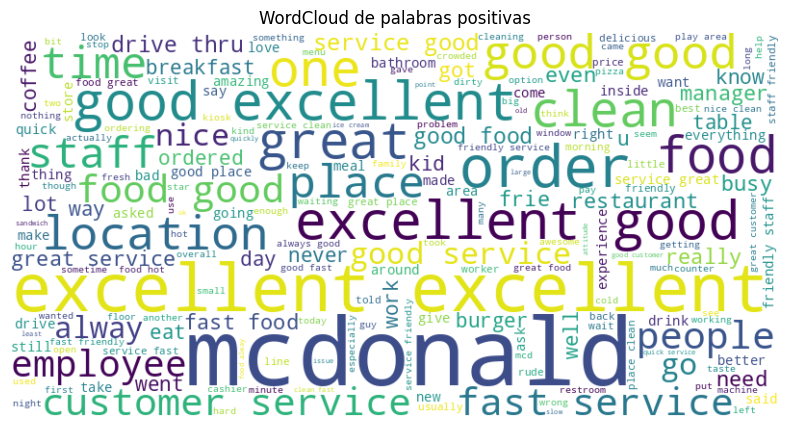

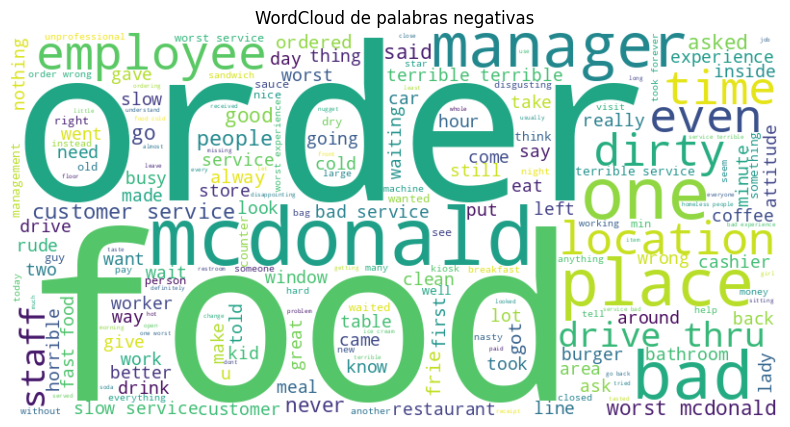

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positivas=df[df['has_positive_words']==True]['review_limpio'].str.cat(sep=' ')
negativas=df[df['has_negative_words']==True]['review_limpio'].str.cat(sep=' ')

#WordCloud positivas
wordcloud_positivas = WordCloud(width=800, height=400, background_color='white').generate(positivas)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positivas, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de palabras positivas')
plt.show()

#WordCloud Negativas
wordcloud_negativas = WordCloud(width=800, height=400, background_color='white').generate(negativas)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negativas, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de palabras negativas')
plt.show()

## 2. Bigrams o Trigrams Frecuentes

- 🔹 ¿Para qué sirve?
Para encontrar frases comunes de dos o tres palabras seguidas como:

  - “mal servicio”

  - “muy limpio”

  - “comida fría”

In [ ]:
df.isnull().sum()

,0
reviewer_id,0
store_name,0
store_category,0
store_address,0
latitude,0
longitude,0
num_ratings,0
review_time,0
review,0
rating,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

#Extraer solo el texto limpio
textos = df['review_limpio'].dropna()

#Vectorizador para BIGGRAMS
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigram = bigram_vectorizer.fit_transform(textos)

#Vectorizador para TRIGRAMS
bigrams=pd.DataFrame(X_bigram.sum(axis=0),columns=bigram_vectorizer.get_feature_names_out()).T
bigrams.columns = ['frecuencia']
bigrams = bigrams.sort_values('frecuencia', ascending=False)
bigrams.head(10)

,frecuencia
customer service,1134
fast food,901
fast service,499
food good,435
good service,435
order wrong,410
ice cream,381
good food,368
20 minutes,329
great service,307


## 3. Asociación entre ciertas palabras y calificaciones


🔹 ¿Para qué sirve?
Para saber si palabras como “sucio”, “frío”, “rápido” están correlacionadas con calificaciones altas o bajas.

In [ ]:
positivos=df[df['has_positive_words']==True]
negativos=df[df['has_negative_words']==True]

#Contar aparicion de palabras especificas
palabras_objetivo = ['cold', 'fast', 'late', 'expensive','badly', 'friendly']
for palabra in palabras_objetivo:
    positivos_cont = positivos['review_limpio'].str.count(palabra).sum()
    negativos_cont = negativos['review_limpio'].str.count(palabra).sum()
    print(f"'{palabra}': Positivos: {positivos_cont}, Negativos: {negativos_cont}")

'cold': Positivos: 176, Negativos: 365
'fast': Positivos: 1970, Negativos: 353
'late': Positivos: 211, Negativos: 159
'expensive': Positivos: 71, Negativos: 21
'badly': Positivos: 9, Negativos: 42
'friendly': Positivos: 1520, Negativos: 140


## 4. Clasificador de sentimiento (Naive Bayes o Logistic Regression)

🔹 ¿Para qué sirve?
Para predecir automáticamente si una reseña es positiva o negativa con solo leer el texto.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Drop rows with missing values in 'review_limpio'
df_cleaned = df.dropna(subset=['review_limpio'])

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_cleaned['review_limpio'])
y = df_cleaned['has_positive_words']

# division en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Evaluacion
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4141    2]
 [ 202 2332]]
              precision    recall  f1-score   support

       False       0.95      1.00      0.98      4143
        True       1.00      0.92      0.96      2534

    accuracy                           0.97      6677
   macro avg       0.98      0.96      0.97      6677
weighted avg       0.97      0.97      0.97      6677



#6. Modelado (Machine Learning básico)

Opciones:
- Clustering de sucursales o reviews (KMeans)
- Clasificación de reseñas (positiva/negativa) con ML
- Reducción de dimensionalidad con PCA/T-SNE para visualizar clusters

Al estar limpio el texto del documento, lo que se hara seria vectorizar el texto

In [ ]:
!pip install scikit-learn

In [ ]:
df['review_limpio'] = df['review_limpio'].fillna('').astype(str)

In [ ]:
print(df['review_limpio'].isnull().sum())
print(df['review_limpio'].head())

0
0    look like someone spit food? normal transactio...
1    mcdonalds. far food atmosphere go. staff make ...
2    made mobile order got speaker checked in. line...
3    mc. crispy chicken sandwich ïïïïïïïïïïïïïïïïïï...
4    repeat order 3 times drive thru, still manage ...
Name: review_limpio, dtype: object


In [ ]:
df = df[df['review_limpio'].str.strip() != '']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)  # puedes ajustar el número de palabras clave
X = vectorizer.fit_transform(df['review_limpio'])

####KMeans Clustering
Agrupamos las reseñas en clusters (temas o tipos de comentarios).

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

df['cluster'] = kmeans.labels_

/tmp/ipython-input-39-4148991756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


####Análisis de clusters
Veamos cómo son los grupos.

In [ ]:
#Ver algunas reseñas por cluster
for i in range(5):
  print(f"Cluster {i}:")
  print(df[df['cluster'] == i]['review_limpio'].sample(3).values)

Cluster 0:
['service good , food value good !' 'good' 'good experience hiccups.']
Cluster 1:
['excellent' 'excellent' 'excellent']
Cluster 2:
['clean friendly service..especially cashier patricia'
 'coffee hot staff friendly, thank customer service!'
 'good food, terrible service. youïïïïïïïïïïïïïïïïïïïïïïïï']
Cluster 3:
['stale fries ask remake oil wasnt filtered good enough'
 'mcdonald\'s restaurants, location worst - purely customer service. last night (22/10), whoever worked needs let go. customers yelled - virtual cash register working receipt, boyfriend went front register pay worker yanked card bfs hand, sighed like super annoying. turned around wait, heard saying loud \'customers stupid, listening" :/ customers got yelled sitting down. also needed go bathroom know shut got yelled at. sure going rather staff rude cut it.'
 "can't even give star nazty service sucked many things going wrong decided go else ooooh hell bday party mcdonald's zoo really know ïïïï"]
Cluster 4:
['neutra

In [ ]:
import numpy as np

centroids = kmeans.cluster_centers_
terms = vectorizer.get_feature_names_out()

for i in range(5):
    top_words_idx = centroids[i].argsort()[-10:][::-1]
    top_words = [terms[j] for j in top_words_idx]
    print(f"Cluster {i}: {' | '.join(top_words)}")

Cluster 0: good | food | service | place | coffee | always | fast | breakfast | mcdonald | clean
Cluster 1: excellent | service | food | attention | place | customer | good | thanks | staff | people
Cluster 2: service | fast | great | food | poor | good | customer | friendly | clean | quick
Cluster 3: food | mcdonald | order | place | drive | good | get | staff | always | nice
Cluster 4: neutral | girl | getting | gets | get | generally | gave | garbage | game | fun


###Visualización
Si quieres ver en 2D cómo se agrupan las reseñas:

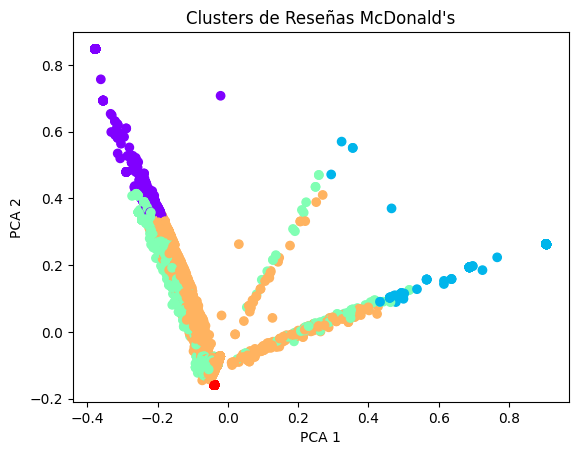

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(X.toarray())

plt.scatter(reduced[:, 0], reduced[:, 1], c=df['cluster'], cmap='rainbow')
plt.title("Clusters de Reseñas McDonald's")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


Cada punto = una reseña.

Colores distintos = distintos grupos temáticos (clusters) que KMeans detectó en las reseñas.

Agrupamientos visuales = reseñas que hablan de cosas similares están más cercanas entre sí.



###Bigrams o trigrams frecuentes

Usaremos CountVectorizedd

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X_bigram = bigram_vectorizer.fit_transform(df['review_limpio'])

#trigrams
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
X_trigram = trigram_vectorizer.fit_transform(df['review_limpio'])



Mostraremos los mas frecuentes

In [ ]:
import numpy as np

# Bigrams más frecuentes
bigram_counts = np.asarray(X_bigram.sum(axis=0)).flatten()
bigram_vocab = bigram_vectorizer.get_feature_names_out()
bigram_freq = list(zip(bigram_vocab, bigram_counts))
bigram_freq_sorted = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

print("🔸 Top 10 Bigrams:")
for phrase, count in bigram_freq_sorted[:10]:
    print(f"{phrase}: {count}")



🔸 Top 10 Bigrams:
customer service: 1134
fast food: 901
fast service: 499
food good: 435
good service: 435
order wrong: 410
ice cream: 381
good food: 368
20 minutes: 329
great service: 307


In [ ]:
trigram_counts = np.asarray(X_trigram.sum(axis=0)).flatten()
trigram_vocab = trigram_vectorizer.get_feature_names_out()
trigram_freq = list(zip(trigram_vocab, trigram_counts))
trigram_freq_sorted = sorted(trigram_freq, key=lambda x: x[1], reverse=True)

print("🔹 Top 10 Trigrams:")
for phrase, count in trigram_freq_sorted[:10]:
    print(f"{phrase}: {count}")


🔹 Top 10 Trigrams:
open 24 hours: 127
great customer service: 116
got order wrong: 108
fast food restaurant: 92
ice cream machine: 92
good customer service: 82
horrible customer service: 63
bad customer service: 54
fast friendly service: 54
food hot fresh: 54


In [ ]:
for i in range(df['cluster'].nunique()):
    print(f"\nCluster {i}")
    subset = df[df['cluster'] == i]['review_limpio']

    vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
    X = vectorizer.fit_transform(subset)
    counts = np.asarray(X.sum(axis=0)).flatten()
    vocab = vectorizer.get_feature_names_out()
    freq = list(zip(vocab, counts))
    freq_sorted = sorted(freq, key=lambda x: x[1], reverse=True)
    for phrase, count in freq_sorted[:5]:
        print(f"{phrase}: {count}")



Cluster 0
good food: 125
good service: 124
food good: 53
good place: 37
service good: 28

Cluster 1
excellent service: 29
service excellent: 7
excellent attention: 5
customer service: 4
excellent atention: 4

Cluster 2
fast service: 464
customer service: 457
fast food: 440
great service: 276
good service: 175

Cluster 3
customer service: 672
fast food: 458
order wrong: 401
ice cream: 375
20 minutes: 324

Cluster 4


ValueError: empty vocabulary; perhaps the documents only contain stop words

### Asociación entre palabras y calificaciones

####Separar entre reseñas positivas vs negativas
Puedes hacer una división simple:

In [ ]:
df['has_positive_words']=df['has_positive_words'].apply(lambda x: 1 if x else 0)

/tmp/ipython-input-47-292583794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_positive_words']=df['has_positive_words'].apply(lambda x: 1 if x else 0)


####Extraer palabras frecuentes por grupo

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['review_limpio'])

# Convertimos a DataFrame para análisis más cómodo
words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
words_df['has_positive_words'] = df['has_positive_words'].values

Sacar frecuencias por  clase

In [ ]:
frecuencia_positiva = words_df[words_df['has_positive_words'] == 1].sum().drop('has_positive_words')
frecuencia_negativa = words_df[words_df['has_positive_words'] == 0].sum().drop('has_positive_words')

Comparacion directa de palbras

In [ ]:
comparacion = pd.DataFrame({
    'positivo': frecuencia_positiva,
    'negativo': frecuencia_negativa
})

comparacion['diferencia'] = comparacion['positivo'] - comparacion['negativo']
comparacion = comparacion.sort_values('diferencia', ascending=False)


In [ ]:
print("💚 Palabras más asociadas a buenas calificaciones:")
print(comparacion.head(10))


💚 Palabras más asociadas a buenas calificaciones:
           positivo  negativo  diferencia
good           5608         0        5608
excellent      2537         0        2537
great          2331         0        2331
clean          2019         0        2019
friendly       1465         0        1465
fast           1575      1158         417
delicious       245         0         245
amazing         207         0         207
tasty           136         0         136
cleaning        122         0         122


/tmp/ipython-input-55-566094998.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.index, y=top['diferencia'], palette='Greens')


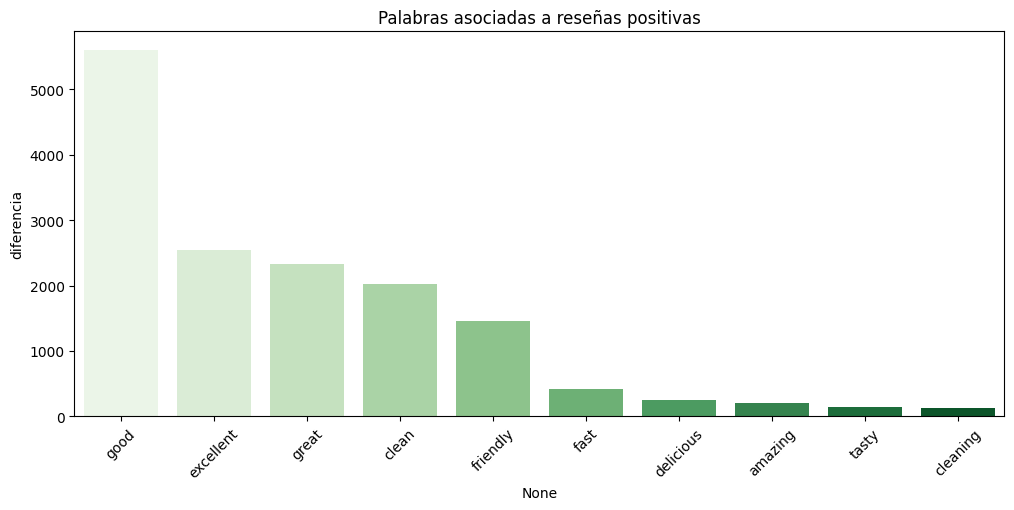

/tmp/ipython-input-55-566094998.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom.index, y=bottom['diferencia'], palette='Reds')


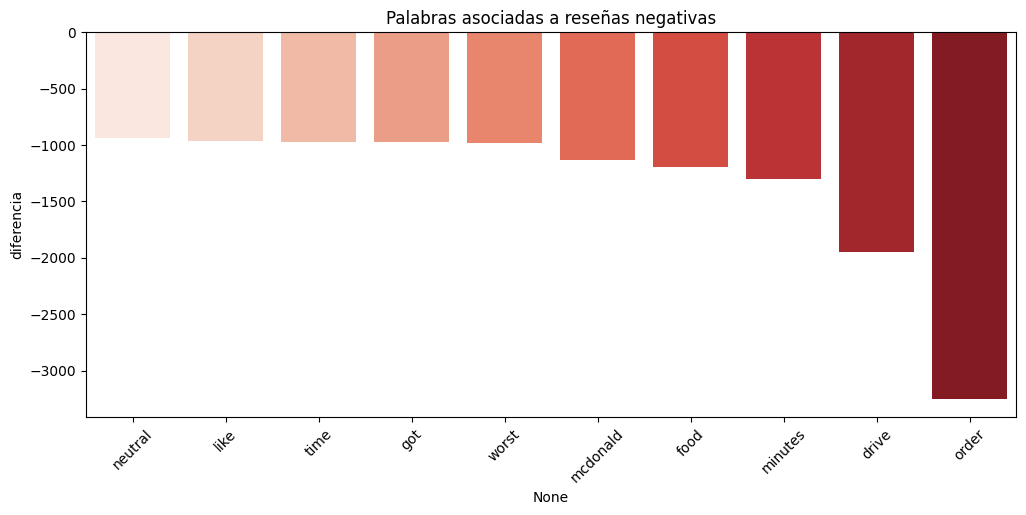

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top = comparacion.head(10)
bottom = comparacion.tail(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top.index, y=top['diferencia'], palette='Greens')
plt.title("Palabras asociadas a reseñas positivas")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x=bottom.index, y=bottom['diferencia'], palette='Reds')
plt.title("Palabras asociadas a reseñas negativas")
plt.xticks(rotation=45)
plt.show()


###Etiquetar sentimiento
Primero transformamos la calificación numérica (rating) en etiquetas binarias.

In [ ]:
#Ejemplo 4 y 5 estreññas =Positivo, el resto = negativo
df['sentimiento'] = df['rating_score'].apply(lambda x: 1 if x >= 4 else 0)


/tmp/ipython-input-56-3870560175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentimiento'] = df['rating_score'].apply(lambda x: 1 if x >= 4 else 0)


Vectorizamos con TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['review_limpio'])
y = df['sentimiento']


####Entrenamiento y prueba
Dividimos los datos en entrenamiento y test:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print("Naive Bayes")
print(classification_report(y_test, y_pred))

Naive Bayes
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      3444
           1       0.86      0.81      0.83      3233

    accuracy                           0.84      6677
   macro avg       0.84      0.84      0.84      6677
weighted avg       0.84      0.84      0.84      6677



Logistic Regression

In [ ]:
from  sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, y_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3444
           1       0.87      0.83      0.85      3233

    accuracy                           0.85      6677
   macro avg       0.86      0.85      0.85      6677
weighted avg       0.86      0.85      0.85      6677



###Probar con una reseña nueva

In [ ]:
nueva_review = ["The fries were cold and the staff was rude."]
nueva_vec = vectorizer.transform(nueva_review)

pred_nb = nb_model.predict(nueva_vec)[0]
pred_lr = lr_model.predict(nueva_vec)[0]

print(f"Naive Bayes: {'Positiva' if pred_nb == 1 else 'Negativa'}")
print(f"Logistic Regression: {'Positiva' if pred_lr == 1 else 'Negativa'}")


Naive Bayes: Negativa
Logistic Regression: Negativa
